# Import Libraries

In [1]:
import numpy as np 

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import random

# Import Data

In [2]:
def get_data():
    #Source: University of California. (n.d). Machine-learning-databases. http://archive.ics.uci.edu/ml/machine-learning-databases/housing/
    #Source: University of California. (n.d). Machine learning repository. http://archive.ics.uci.edu/ml/datasets/iris 
    #Source: Iris flower dataset. (2020). Wikipedia. https://en.wikipedia.org/wiki/Iris_flower_data_set
 
    #house_data = datasets.load_boston() #Scikit-learn provides a handy description of the dataset, and it can be easily viewed by:
    #Print (data.DESCR) 
    #Print (data) 

    diabetes = datasets.load_diabetes() 

    data_input = diabetes.data[:, np.newaxis, 2] 

    x_train = data_input[:-20]
    x_test = data_input[-20:]

    # Split the targets into training/testing sets
    y_train = diabetes.target[:-20]
    y_test = diabetes.target[-20:]

    # Split the data into training/testing sets

    return x_train, x_test, y_train, y_test

def generate_syntheticdata():

    data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
    #Print(data_x, ' ** ')
    data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
    #Print(data_y, ' **** ')
    
    data_x /= np.max(data_x) 
    data_x = np.hstack((np.ones_like(data_x), data_x))

    order = np.random.permutation(len(data_x))
    portion = 20
    x_test = data_x[order[:portion]]
    y_test = data_y[order[:portion]]
    x_train = data_x[order[portion:]]
    y_train = data_y[order[portion:]]

    return x_train, x_test, y_train, y_test

# Scratch Calc Functions

In [3]:
def get_gradient(w, x, y):
    #Source: Frossard, D. (2016). Linear Regression with NumPy. https://www.cs.toronto.edu/~frossard/post/linear_regression/
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.power(error, 2)



In [4]:
def numpy_linear_mod(x_train, x_test, y_train, y_test):
    #Source:  Frossard, D. (2016). Linear Regression with NumPy. https://www.cs.toronto.edu/~frossard/post/linear_regression/
    print(' running numpy linear model')
    w = np.random.randn(2)
    alpha = 0.5
    tolerance = 1e-5

    # Perform Gradient Descent
    iterations = 1
    while True:
        gradient, error = get_gradient(w, x_train, y_train)
        new_w = w - alpha * gradient
        # Stopping Condition
        if np.sum(abs(new_w - w)) < tolerance:
            print("Converged.")
            break
    
        # Print error every 50 iterations
        if iterations % 5 == 0:
            mean_squared_error =  np.sum(error)/error.shape
            print(iterations, mean_squared_error)
    
        iterations += 1
        w = new_w

# Scipy Linear Model

In [5]:
def scipy_linear_mod(x_train, x_test, y_train, y_test):
    #Source: Scikit Learn. (n.d). Linear Regression Example. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html 

    print(' running scipy linear model')

    regr = linear_model.LinearRegression()


    # Create linear regression object

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.savefig('resultlinear_reg.png')
    plt.show()

# Main

In [16]:
x_train, x_test, y_train, y_test = get_data()

    #print(x_train, ' x_train')
    #print(y_train, ' y_train')
    #print(x_test, ' x_test')

print(x_train.shape)
for i in range(5):
    print(f"{x_train[i]=}, {y_train[i]=}")


(422, 1)
x_train[i]=array([0.06169621]), y_train[i]=151.0
x_train[i]=array([-0.05147406]), y_train[i]=75.0
x_train[i]=array([0.04445121]), y_train[i]=141.0
x_train[i]=array([-0.01159501]), y_train[i]=206.0
x_train[i]=array([-0.03638469]), y_train[i]=135.0


 running scipy linear model
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


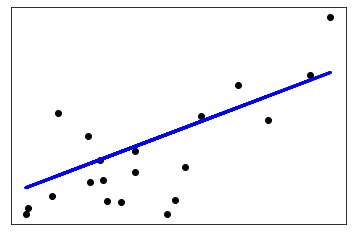

In [7]:
scipy_linear_mod(x_train, x_test, y_train, y_test)

In [8]:
x_train, x_test, y_train, y_test = generate_syntheticdata()

#print(x_train, ' x_train')
#print(y_train, ' y_train')
#print(x_test, ' x_test')
#print(y_test, ' x_test')

In [14]:
print(len(x_train))
for i in range(5):
    print(f"{x_train[i]=}, {y_train[i]=}")


80
x_train[i]=array([1.        , 0.67272727]), y_train[i]=array([4.7485848])
x_train[i]=array([1.        , 0.20909091]), y_train[i]=array([0.8202659])
x_train[i]=array([1.        , 0.47272727]), y_train[i]=array([0.79583413])
x_train[i]=array([1.        , 0.25454545]), y_train[i]=array([0.80200111])
x_train[i]=array([1.        , 0.19090909]), y_train[i]=array([1.36688418])


In [9]:
numpy_linear_mod(x_train, x_test, y_train, y_test)

 running numpy linear model
5 [7.06959616]
10 [5.77643882]
15 [4.7746968]
20 [3.99601362]
25 [3.39072053]
30 [2.92020858]
35 [2.55446596]
40 [2.27016357]
45 [2.04916704]
50 [1.87738001]
55 [1.74384496]
60 [1.64004427]
65 [1.55935697]
70 [1.49663639]
75 [1.44788185]
80 [1.40998353]
85 [1.38052407]
90 [1.35762437]
95 [1.33982376]
100 [1.32598684]
105 [1.31523099]
110 [1.30687016]
115 [1.30037104]
120 [1.29531908]
125 [1.29139205]
130 [1.28833946]
135 [1.28596659]
140 [1.28412208]
145 [1.2826883]
150 [1.28157378]
155 [1.28070742]
160 [1.28003398]
165 [1.2795105]
170 [1.27910358]
175 [1.27878727]
180 [1.27854139]
185 [1.27835027]
190 [1.2782017]
195 [1.27808621]
200 [1.27799644]
205 [1.27792666]
210 [1.27787241]
215 [1.27783025]
220 [1.27779747]
225 [1.27777199]
230 [1.27775219]
235 [1.27773679]
240 [1.27772483]
245 [1.27771552]
250 [1.27770829]
255 [1.27770267]
260 [1.2776983]
265 [1.27769491]
270 [1.27769227]
275 [1.27769022]
280 [1.27768862]
285 [1.27768738]
290 [1.27768642]
295 [1.2776